# Projeto de Data Science sobre o Naufrágio do TITANIC.

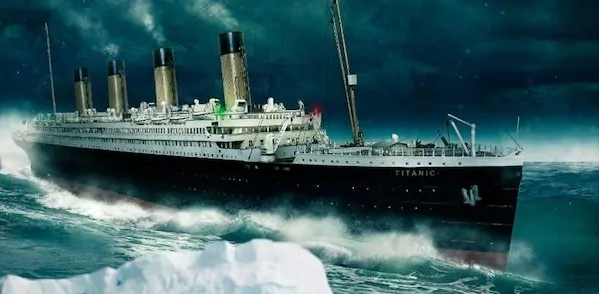

In [9]:
from IPython.display import Image
Image(filename="titanic.png", width=900,height=700)

# Por Isael Oliveira

-> Neste estudo, o objetivo é passar por todas as etapas (ou pelo menos as principais) de um projeto de **Data Science**. Este é o
meu primeiro projeto na área, que foi realizado com a ajuda do Carlos Melo da empresa SIGMOIDAL.

-> O que é **Data Science**? Basicamente é um conjunto de técnicas e ferramentas que permite que você extraia conhecimento de
um conjunto de dados, de forma que esse conhecimento se transforme em informação e consequentemente inteligência para o negócio ao qual está sendo aplicado, gerando assim uma melhor tomada de decisão para as empresas.

-> **Importância de Data Science**. Imagine que você é gestor de marketing de uma empresa e não está mais satisfeito somente em entender o que aconteceu com suas campanhas de marketing (ou seja, cansou de analisar somente o passado), mas sim começar a tentar prever o que irá acontecer nas suas próximas campanhas, tudo baseado nos dados históricos, gerando assim mais lucros e redução de custos, seria no mínimo interessante certo?!  Essa é uma das áreas em que podemos utilizar Data Science, para realizar previsões baseadas nos dados históricos.

-> **Data Science** é portanto a união de 3 áreas: **Ciência da Computação** (programação, processamento, armazenamento), **Matemática/Estatística** e **Conhecimento do Negócio** (que pode ser Agropecuária, Saúde, Direito, Finanças, Marketing) e muito mais, afinal os dados estão presentes em qualquer segmento. 

1) Em um projeto de Ciência de Dados, devemos passar por algumas fases como primeiramente, **entender o problema de negócio**, ou
seja, compreender claramente aquilo que estamos tentando resolver. Essa é uma parte crucial do projeto, afinal uma decisão errada aqui vai acabar comprometendo toda a análise, incluindo na fase de modelagem preditiva.

2) Uma vez entendido o problema, devemos nos preocupar em **como e da onde obteremos** a nossa matéria prima, ou seja, os dados. 
Esses dados podem ser obtidos de diversas fontes, como grandes bancos de dados como: SQL Server, Oracle, PostgreSQL, MongoDB, 
Softwares ERP, SAP, planilhas de Excel, arquivos CSV, TXT, dados extraídos da WEB, dentre outros. Acredito que em grande parte 
das vezes, o Cientista de Dados não irá receber esses dados já prontos. Provavelmente ele terá que entrar no banco, executar 
comandos em linguagem SQL e extrair uma amostra que represente fielmente a população (conceitos estatísticos).

3) Obtido os dados, o foco é agora na **Análise Exploratória de Dados** (AED). Essa etapa é extremamente importante em um projeto de Data Science, pois é onde você vai entender de fato os seus dados. As vezes, quando uma AED é muito bem feita, você consegue responder todas as perguntas e hipóteses, não sendo necessário precisar construir um modelo estatístico. Aqui você vai:
 
 I   -> Estudar características das variáveis (colunas), ou seja, se ela é do tipo quantitativa categórica, nominal,   qualitativa discreta, contínua etc.  
 
 II  -> Verificar e trabalhar com os valores faltantes no seu conjunto de dados.
 
 III -> Verificar a presença de outliers (valores fora da curva) e utilizar técnicas para isso (como interpolação).
 
 IV  -> Verificar o tipo de distribuição do seu conjunto de dados (Normal, Binomial, logarítmica) etc.
 
 V   -> Identificar a varíavel alvo (target).
 
 VI  -> Identificar possíveis correlações, com auxílio de medidas de dispersão estatísticas, como o coeficiente de correlação.
 
 VII -> Visualizar os seus dados em formato de gráficos (histograma, boxplot, scatter plot), pois é muito mais fácil entender
         como seus dados estão se comportando através de forma visual.

4) Após a AED, temos a fase de **pré-processamento dos dados**, onde ocorrerão modificações no dataset como transformação de colunas em linhas, linhas em colunas, remoção de colunas e linhas, junção de dados, como por exemplo, em uma mesma coluna do conjunto de dados você tem dados de hora, minutos e segundos, sendo que, dependendo do problema de negócio que você está tentando resolver, talvez fosse mais interessante distribuir esses dados em colunas diferentes, ou seja, criar uma coluna com dados só referentes a hora, uma coluna somente para minutos e por fim outra somente para segundos. 

5) Finalmente chegamos na fase em que será construído o **modelo de Machine Learning** ou modelo estatístico, ou ainda modelo matemático.

6) Por fim, há a fase de **Avaliação**, onde você avalia como seu modelo perfomou, se ele foi capaz de realizar previsões com alta
acurácia, dentre outros.

In [40]:
#importando as bibliotecas para este estudo.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# permite visualizar todas as colunas
pd.options.display.max_columns = None

In [42]:
#renderiza os gráficos diretamente no notebook
%matplotlib inline

In [43]:
# carregando os arquivos de treino e de teste
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [44]:
#verificando as dimensões do DataFrame (conjunto de dados). Obs: 1 corresponde a qtd COLUNAS, 0 corresponde a qtd LINHAS.
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))

Variáveis:	12
Entradas:	891


In [45]:
#verificando as 5 primeiras linhas do dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dicionário de Dados

Importante para que possamos entender perfeitamente o que cada varíavel (coluna) do conjunto de dados quer dizer.

**PassengerId**: Número de identificação do passageiro

**Survived**: Informa se o passageiro sobreviveu ao desastre

**0** = Não

**1** = Sim

**Pclass**: Classe do bilhete

**1** = 1ª Classe

**2** = 2ª Classe

**3** = 3ª Classe

**Name**: Nome do passageiro

**Sex**: Sexo do passageiro

**Age**: Idade do passageiro

**SibSp**: Quantidade de cônjuges e irmãos a bordo

**Parch**: Quantidade de pais e filhos a bordo

**Ticket**: Número da passagem

**Fare**: Preço da Passagem

**Cabin**: Número da cabine do passageiro

**Embarked**: Porto no qual o passageiro embarcou

**C** = Cherbourg

**Q** = Queenstown

**S**= Southampton

-> **Quais os tipos de cada variável**?

**Variáveis Numéricas (quantitativas) Discretas** (valor inteiro)
     1. Pclass
     2. SibSp
     3. Parch
    
**Variáveis Numéricas Contínuas** (valor float)
     1. Age
     2. Fare
    
**Variável Alvo** 
     1. Survived

**Chave Primária** (identificador único)
    1. PassengerId
    
**Variáveis Categóricas** (qualitativas)
     1. Name
     2. Sex
     3. Ticket
     4. Cabin
     5. Embarked

In [51]:
#Através do comando da linguagem Python, iremos identificar o tipo de cada variável do DataFrame.
display(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [55]:
#Olhando o conjunto de dados de treino.
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
#Vamos agora verificar o percentual de valores faltantes para algumas variáveis.
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

**PERCENTUAL DE VALORES FALTANTES**

A informação sobre a **Cabin** é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna **Age** não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque **(Embarked)** possui apenas 2% de informações faltantes. Provavelmente teremos que trabalhar melhor esses valores faltantes da coluna Cabin mais pra frente.

In [57]:
#Descobrindo algumas informações estatísticas relevantes sobre nosso conjunto de dados.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


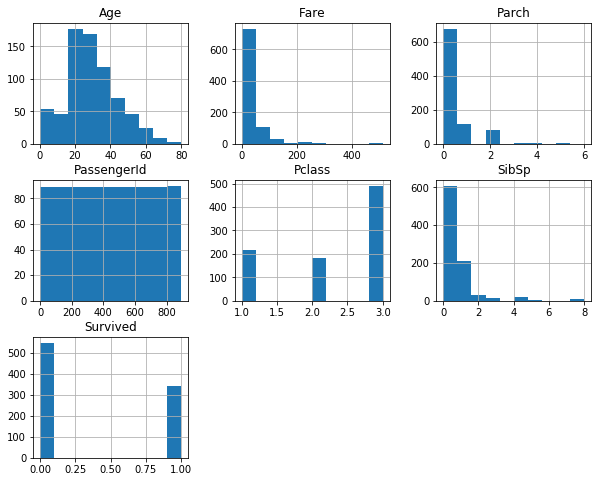

In [67]:
#visualizando as variáveis numéricas através do histograma
train.hist(figsize=(10,8));

### Qual grupo será que tinha mais chance de sobreviver?

In [61]:
#Analisando a probabilidade de sobrevivência por Sexo

train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


#### Insight: Pessoas do sexo feminino tinham 74% de chance de sobreviver ao naufrágio.

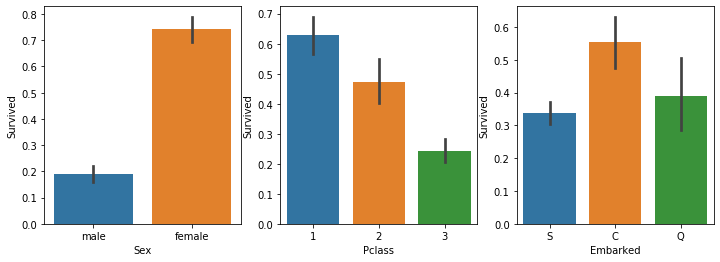

In [66]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

#Verificando graficamente que pessoas do Sexo Feminino tinham mais chance de sobrevivência.
sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)

#Verificando que pessoas da 1º classe tinham mais chance de sobrevivência.
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)

#Verificando que pessoas que embarcaram em Cherbourg tinham mais chance de sobrevivência.
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

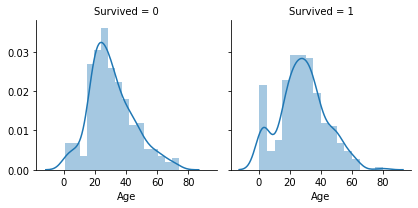

In [75]:
#Verificando influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

#Apesar dos 2 gráficos estarem bem parecidos, podemos tirar de insight que crianças tendem a sobreviver mais, assim como as
#mulheres."Crianças e mulheres primeiro".

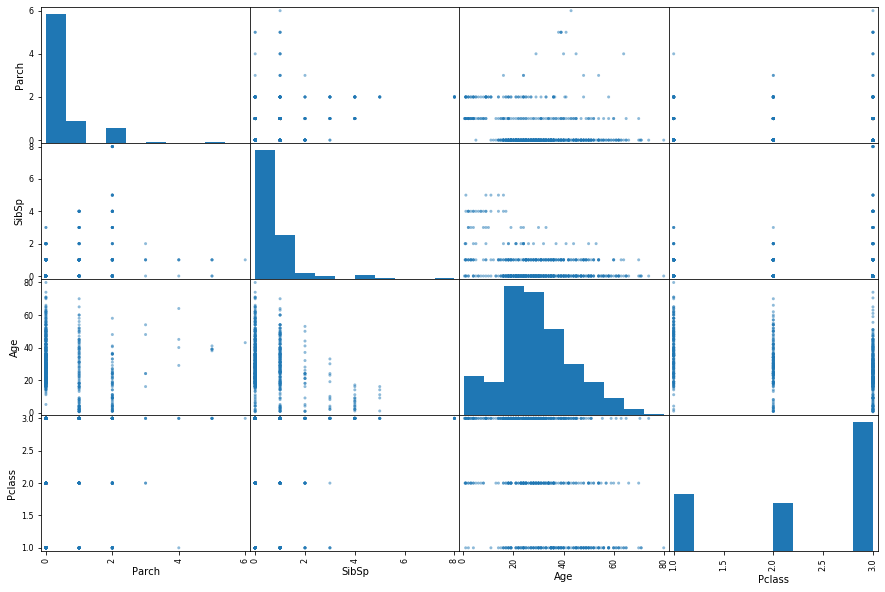

In [76]:
# plotar uma scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10));

#Possível verificar que pessoas mais velhas estão mais na 1º classe e pessoas mais jovens na 3º classe.

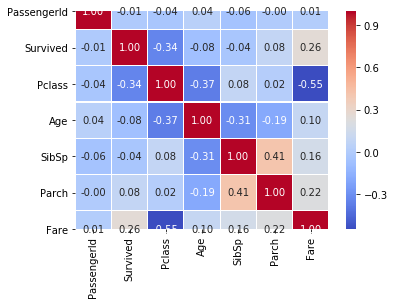

In [78]:
# plotar o heatmap para as variáveis numéricas
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

#gráfico importante que nos permite verificar como as variáveis estão correlacionadas, positiva ou negativamente.

#### O método df.describe() pode ser usado também para ver algo sobre a estatística descritiva em colunas que não são números. Para isso, é só passar o argumento include=['O'].



In [79]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


#### Insights:

1- Não há valores NA (faltantes) para Nome, Sexo.

2- Não temos nomes repetidos, cada nome é único.

3- Existem apenas os sexos Masculino e Feminino, sendo que o com maior frequência é o Masculino (577/891 = 65%);

4- O Porto no qual embarcaram mais passageiros é o de S = Southampton.

# Preparação dos Dados

Uma dica para quando você vai preparar os dados para um modelo de Machine Learning é juntar os datasets de treino e teste em um único, e separar novamente no final.

In [84]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


### Selecionando as features

Provavelmente no nosso conjunto de dados, haverá alguma variável que julgaremos sem muita importância para a análise e construção do modelo preditivo. No nosso caso, vamos desconsiderar as variáveis ['PassengerId', 'Name', 'Ticket', 'Cabin'], pois aparentemente não parecem tão relevantes.

In [91]:
#removendo as variáveis
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#imprimindo na tela o dataset sem as variáveis
df_merged

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
1304,3,male,NaN,0,0,8.0500,S
1305,1,female,39.0,0,0,108.9000,C
1306,3,male,38.5,0,0,7.2500,S
1307,3,male,NaN,0,0,8.0500,S


Como é possível notar, a coluna **Age** possui alguns valores vazios. Existem algumas técnicas para tratar esse tipo de problema,
como Preencher esses valores arbitrariamente (média, mediana, valor mais frequente), excluir a linha inteira e interpolação.
-Excluir uma linha inteira pode não ser a melhor decisão, pois podemos jogar muito informação "fora".

In [92]:
# verificando quantos valores vazios há para cada uma das variáveis
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

É possível notar que há 263 valores vazios para a variável **Age**, 1 para a variável **Fare** e 2 para **Embarked**.

Para as variáveis **idade** e **tarifa**, vou colocar o valor da mediana, e para a variável do porto de **embarque**, vou colocar o valor com maior frequência.

In [94]:
# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

# Preparando as variáveis pro modelo

O modelo matemático exige que trabalhemos com **variáveis numéricas**, ou seja, temos transformar os dados de entrada que estão em formato categoria para **números**.

Como você vê abaixo, eu convertir os valores possíveis de Sexpara {'male': 0, 'female': 1}. Já em relação à variável Embarked, apliquei o conceito de variáveis dummies.

As variáveis dummies (dummy variables) assumem aqui apenas valores 0 e 1, criando uma nova coluna para cada valor possível da variável categórica. Para ficar mais fácil entender, veja como fica o DataFrame após todos esses tratamentos:


In [96]:
# converter 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


#### Recuperando os datasets de treino e teste

Aqui a gente acabou de preparar o dataset para o modelo e agora vou df_merged em train e test, exatamente como era no começo.

É possível agora entender a razão da concatenação lá em cima. Teríamos trabalho dobrado e ainda teria o risco de errarmos em alguma etapa.

In [97]:
# recuperar datasets de treino e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

# Construção do modelo e avaliação

Foi possível perceber que a etapa mais demorada de um projeto de Data Science é a AED e a preparação deles. Com os dados pron-
tos podemos construir rapidamente um modelo de Machine Learning para trabalhar a partir do nosso dataset.''

In [99]:
# importando bibliotecas do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [100]:
# criando um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificando a acurácia do modelo
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.13


In [101]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# gerar arquivo csv
submission.to_csv('./submission_lr.csv', index=False)

In [102]:
# criando um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificando a acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


In [103]:
#arquivo para submeter ao Kaggle
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# gerar arquivo csv
submission.to_csv('./submission_tree.csv', index=False)

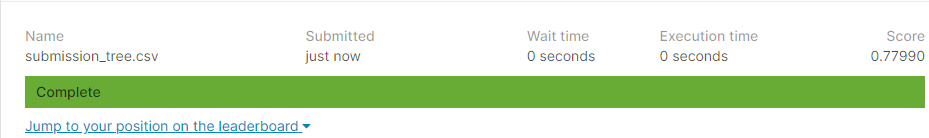

In [112]:
#Mostrando o valor da acurácia após a submissão no Kaggle, onde foi atingido uma acurácia de 78%.
from IPython.display import Image
Image(filename="kaggle.png", width=700,height=700)

# Você/Eu sobreviveria ao naufrágio do Titanic?

Já que o modelo está pronto, vamos ver se **eu e a minha prima** sobreviveríamos ao naufrágio do Titanic.

Vou considerar que viajaríamos na 2ª Classe, eu com 25 anos e ela com 30, sendo que ela levaria sua filha Clara, tendo pago o 
preço médio do Ticket e embarcados no porto de Southampton (Reino Unido).

In [116]:
# declarar os valores das variáveis para mim e minha prima
isael_oliv = np.array([2, 0, 25, 1, 0, 32.2, 0, 0, 0, 1]).reshape((1, -1))
sanny = np.array([2, 1, 30, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))

# verificar se nós teríamos sobrevivido
print("Isael_Oliveira:\t{}".format(tree_model.predict(isael_oliv)[0]))
print("Sanny:\t{}".format(tree_model.predict(sanny)[0]))

Isael_Oliveira:	0
Sanny:	1


## LEGENDAS:

0 = Não Sobreviveu

1 = Sobreviveu

**Resumo:** Claramente pode-se perceber que algumas verdades presentes no filme do Titanic são verdades, como mulheres e crianças
        com uma maior chance de sairem vivas, assim como pessoas com uma boa condição financeira. Apesar de algumas coisas parecerem meio óbvias, tudo isso foi comprovado através de dados.